In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=55

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
[0 0 2 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 2 1 1 1 0 0 0]


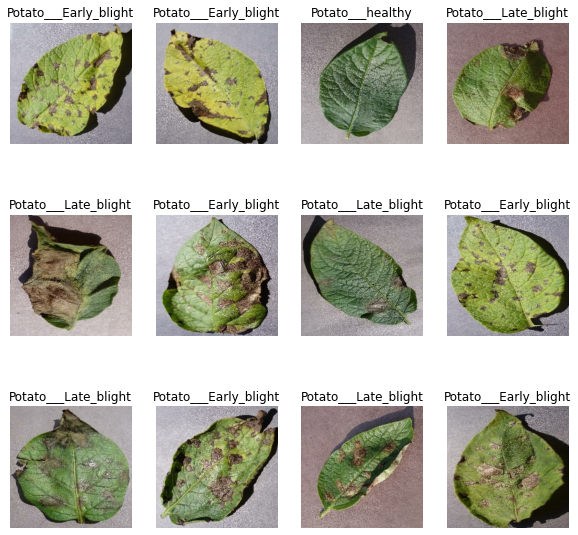

In [5]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [6]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [7]:
train_dataset = dataset.take(54)
len(train_dataset)

54

In [8]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [9]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [10]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [11]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [12]:
def get_dataset_partitions_tf(ds, train_split=0.75, val_split=0.1, test_split=0.15, shuffle=True, shuffle_size=10000):
   
    assert(train_split+val_split+test_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_dataset = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_dataset, val_ds, test_ds

In [13]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [14]:
len(train_ds)

51

In [15]:
len(val_ds)

6

In [16]:
len(test_ds)

11

In [17]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [18]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.7294118  0.70980394 0.73333335]
  [0.73333335 0.7137255  0.7372549 ]
  [0.73333335 0.7137255  0.7372549 ]
  ...
  [0.56078434 0.53333336 0.56078434]
  [0.6156863  0.5882353  0.6156863 ]
  [0.70980394 0.68235296 0.70980394]]

 [[0.7529412  0.73333335 0.75686276]
  [0.75686276 0.7372549  0.7607843 ]
  [0.75686276 0.7372549  0.7607843 ]
  ...
  [0.6039216  0.5764706  0.6039216 ]
  [0.5882353  0.56078434 0.5882353 ]
  [0.5686275  0.5411765  0.5686275 ]]

 [[0.7490196  0.7294118  0.7529412 ]
  [0.7490196  0.7294118  0.7529412 ]
  [0.74509805 0.7254902  0.7490196 ]
  ...
  [0.5764706  0.54901963 0.5764706 ]
  [0.60784316 0.5803922  0.60784316]
  [0.57254905 0.54509807 0.57254905]]

 ...

 [[0.7294118  0.69411767 0.7058824 ]
  [0.74509805 0.70980394 0.72156864]
  [0.75686276 0.72156864 0.73333335]
  ...
  [0.5411765  0.5019608  0.49803922]
  [0.59607846 0.5568628  0.5529412 ]
  [0.54901963 0.50980395 0.5058824 ]]

 [[0.69803923 0.6627451  0.6745098 ]
  [0.7137255  0.6784314  0.6901961 ]


In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
]
)

In [20]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
]
)

In [21]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [24]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/55
51/51 [==============================] - 146s 3s/step - loss: 0.9033 - accuracy: 0.4761 - val_loss: 0.8908 - val_accuracy: 0.5885
Epoch 2/55
51/51 [==============================] - 133s 3s/step - loss: 0.7307 - accuracy: 0.6422 - val_loss: 0.6707 - val_accuracy: 0.6615
Epoch 3/55
51/51 [==============================] - 133s 3s/step - loss: 0.5837 - accuracy: 0.7341 - val_loss: 0.9322 - val_accuracy: 0.5781
Epoch 4/55
51/51 [==============================] - 133s 3s/step - loss: 0.5403 - accuracy: 0.7580 - val_loss: 0.4245 - val_accuracy: 0.8646
Epoch 5/55
51/51 [==============================] - 133s 3s/step - loss: 0.3887 - accuracy: 0.8321 - val_loss: 0.3340 - val_accuracy: 0.8906
Epoch 6/55
51/51 [==============================] - 132s 3s/step - loss: 0.2164 - accuracy: 0.9154 - val_loss: 0.2767 - val_accuracy: 0.8906
Epoch 7/55
51/51 [==============================] - 132s 3s/step - loss: 0.4025 - accuracy: 0.8401 - val_loss: 0.2607 - val_accuracy: 0.8802
Epoch 8/55
51

In [1]:
len(test_ds)

NameError: name 'test_ds' is not defined

In [35]:
scores = model.evaluate(test_ds)

11/11 [==============================] - 5s 492ms/step - loss: 0.1788 - accuracy: 0.9517


In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
len(history.history['loss'])

55

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

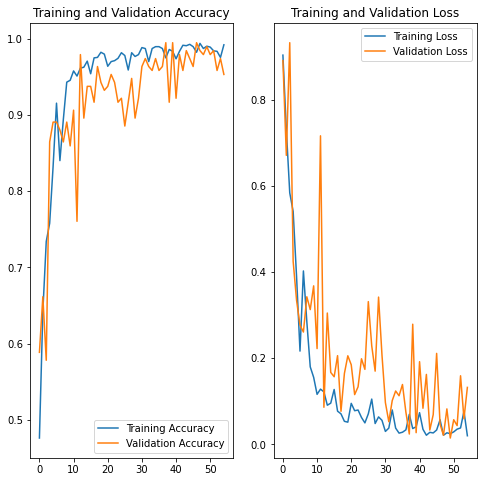

In [30]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
Actual Label: Potato___healthy
Predicted Label: Potato___healthy


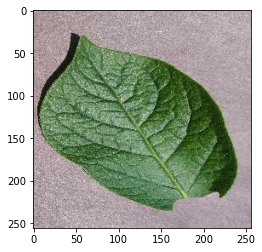

In [31]:
import numpy as np
for image_batch, labels_batch in dataset.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Label:", class_names[labels_batch[0].numpy()])
    batch_prediction = model.predict(image_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [32]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)#Create batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence



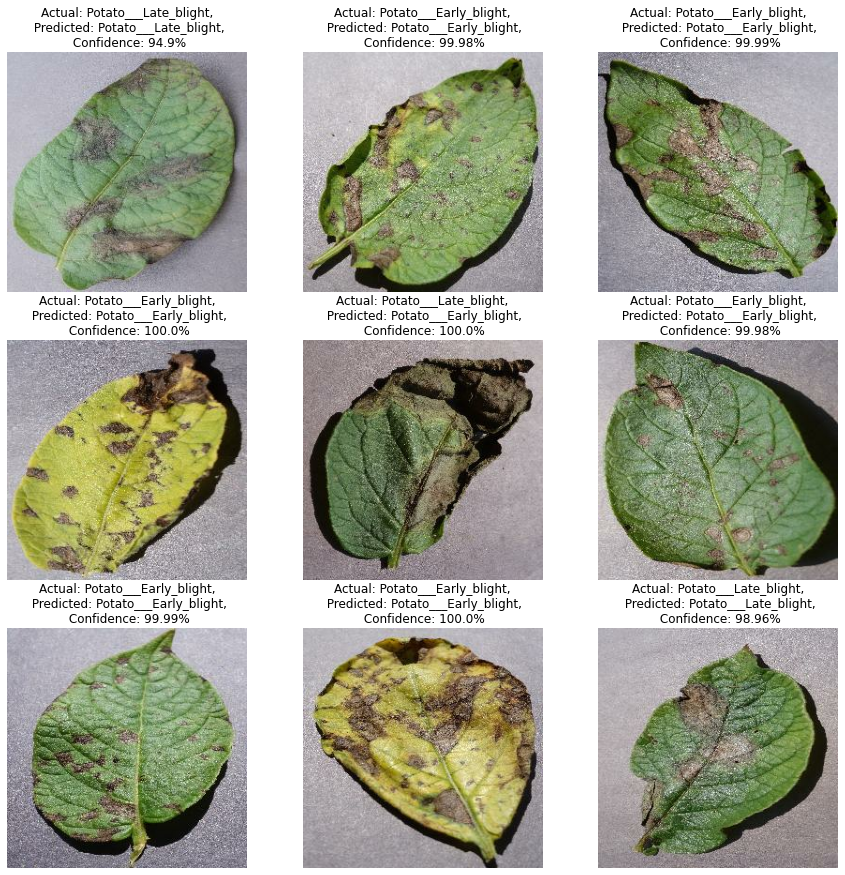

In [33]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}%")
        plt.axis("off")

In [34]:
import os
model_version = 2
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets
